In [1]:
import pandas as pd
import json

with open('mpathic_pf_full.json') as f:
    data = json.load(f)

In [2]:
# Use pd.json_normalize to convert the JSON to a DataFrame
df = pd.json_normalize(data['analytics']['speaker_analytics'], 
                     meta=['id', ['analytics', 'utterance_count'], ['analytics', 'talk_turn_count']])

# Rename the columns for clarity
# df.columns = ['Title', 'Author_First_Name', 'Author_Last_Name', 'Publisher_Name', 'Publisher_Location']
df.columns = ['Speaker', 'role', 'Utterance_count', 'Talk_turn_count',
       'appreciation',
       'conflict',
       'confront',
       'instruct_direction',
       'instruct',
       'low_curiosity',
       'high_curiosity',
       'preparation',
       'reflective_listening',
       'analytics.frequencies.appreciation', 'analytics.frequencies.conflict',
       'analytics.frequencies.confront',
       'analytics.frequencies.instruct_direction',
       'analytics.frequencies.instruct', 'analytics.frequencies.low_curiosity',
       'analytics.frequencies.high_curiosity',
       'analytics.frequencies.preparation',
       'analytics.frequencies.reflective_listening',
       'analytics.metrics.collaboration.contributing_behaviors',
       'analytics.metrics.collaboration.score',
       'analytics.metrics.curiosity.contributing_behaviors',
       'analytics.metrics.curiosity.score',
       'analytics.metrics.empathy.contributing_behaviors',
       'analytics.metrics.empathy.score']

# Display the DataFrame
print(df)
print(df.columns)

   Speaker role  Utterance_count  Talk_turn_count  appreciation  conflict  \
0  VINCENT                    36               27             1         7   
1    JULES                   128               53             2        30   
2   PATRON                     2                1             0         0   
3  PUMPKIN                    41               33             1         4   
4  YOLANDA                    24               14             0         7   
5  MANAGER                    10                5             0         0   

   confront  instruct_direction  instruct  low_curiosity  ...  \
0         1                   0         0              7  ...   
1         6                   8         1              7  ...   
2         0                   0         0              0  ...   
3         2                   7         0              6  ...   
4         4                   7         0              2  ...   
5         1                   3         0              0  ...   

   a

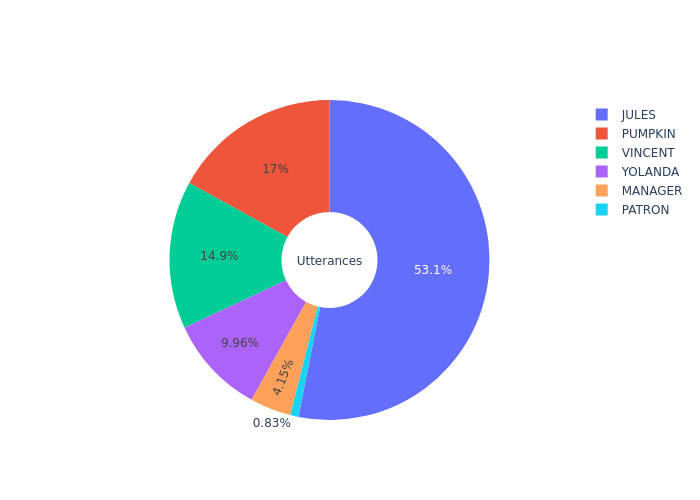

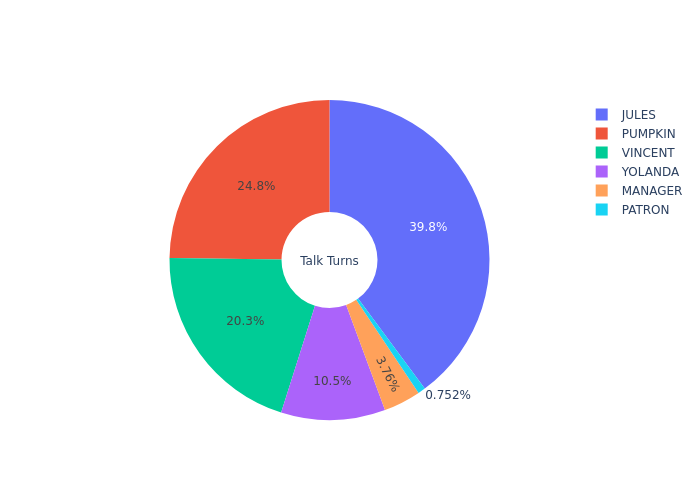

In [3]:
import plotly.graph_objects as go


labels = df['Speaker']
values = df['Utterance_count']

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values,title="Utterances", hole=.3)] )
fig.show("png")

labels = df['Speaker']
values = df['Talk_turn_count']

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values,title="Talk Turns", hole=.3)] )
fig.show("png")

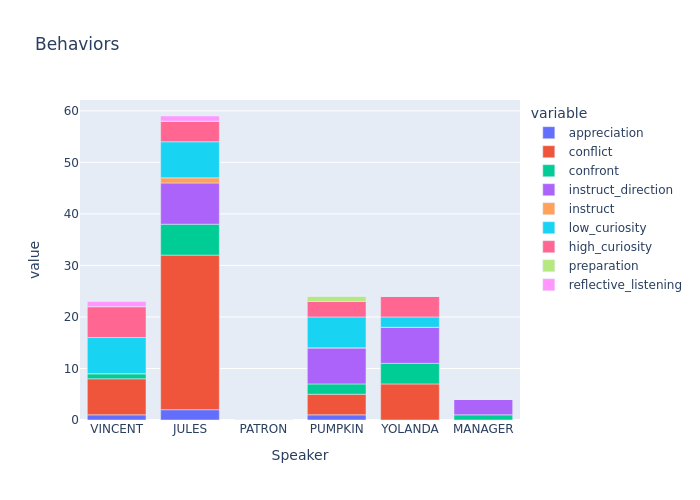

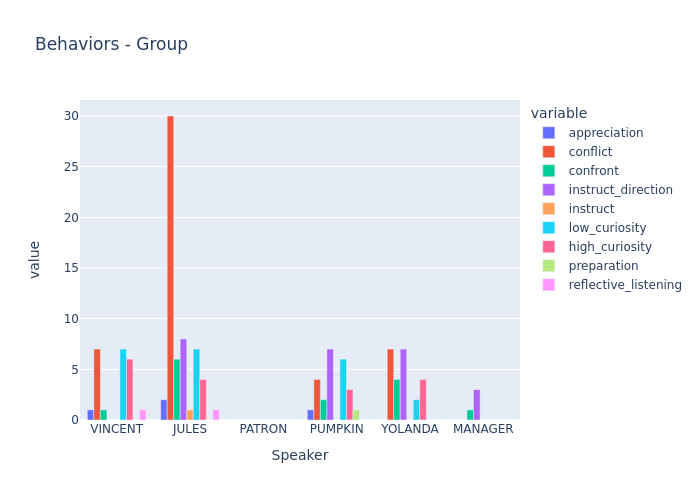

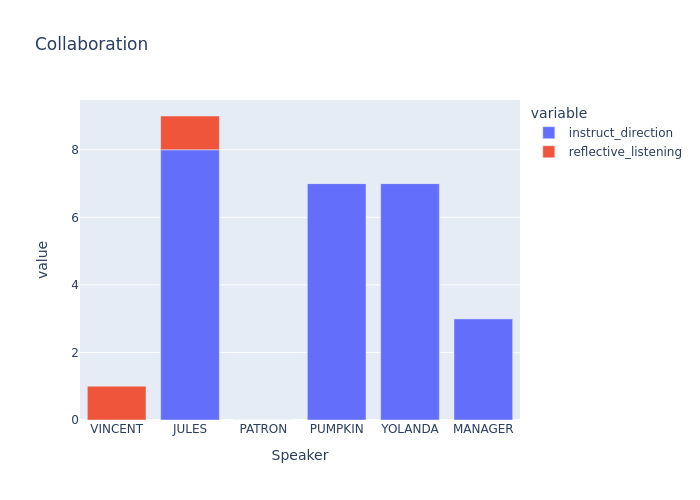

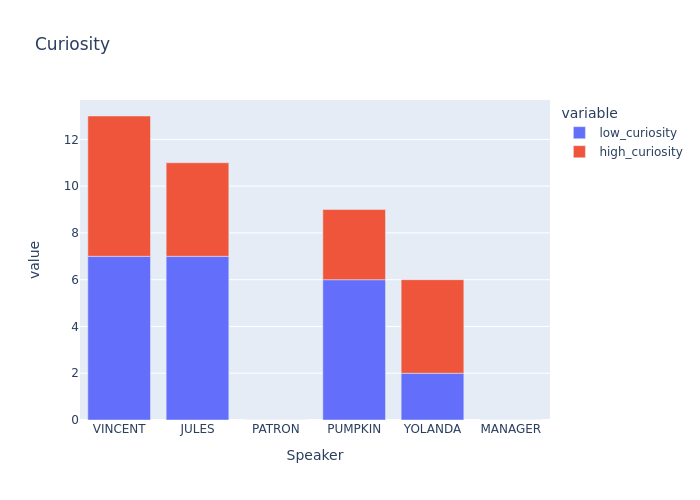

In [4]:
import plotly.express as px

fig = px.bar(df, x="Speaker", y=['appreciation',
       'conflict',
       'confront',
       'instruct_direction',
       'instruct',
       'low_curiosity',
       'high_curiosity',
       'preparation',
       'reflective_listening'], title="Behaviors")
fig.show("png")

fig = px.bar(df, x="Speaker", y=['appreciation',
       'conflict',
       'confront',
       'instruct_direction',
       'instruct',
       'low_curiosity',
       'high_curiosity',
       'preparation',
       'reflective_listening'], title="Behaviors - Group")
fig.update_layout(barmode='group')
fig.show("png")

fig = px.bar(df, x="Speaker", y=[
       'instruct_direction',
       'reflective_listening'], title="Collaboration")
fig.show("png")

fig = px.bar(df, x="Speaker", y=[
       'low_curiosity',
       'high_curiosity',
      ], title="Curiosity")
fig.show("png")





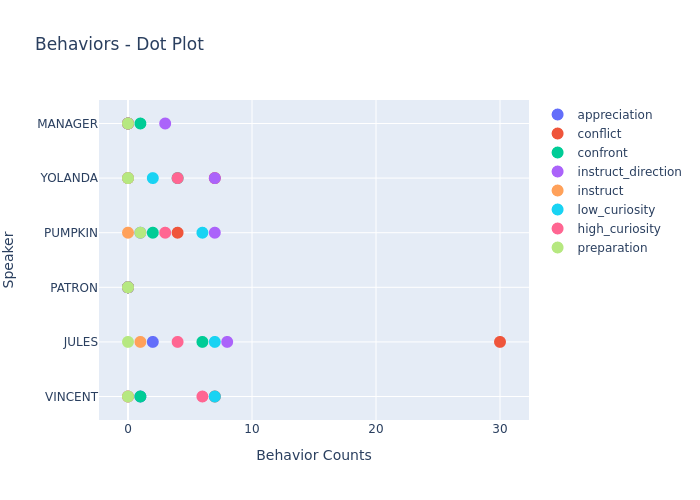

In [5]:
import plotly.graph_objects as go

fig = go.Figure()

behaviors = [       'appreciation',
       'conflict',
       'confront',
       'instruct_direction',
       'instruct',
       'low_curiosity',
       'high_curiosity',
       'preparation',]

for b in behaviors:
    fig.add_trace(go.Scatter(
        x=df[b],
        y=df['Speaker'],
        marker=dict(size=12),
        mode="markers",
        name=b,
    ))





fig.update_layout(title="Behaviors - Dot Plot",
                  xaxis_title="Behavior Counts",
                  yaxis_title="Speaker")

fig.show("png")

_______________

VINCENT


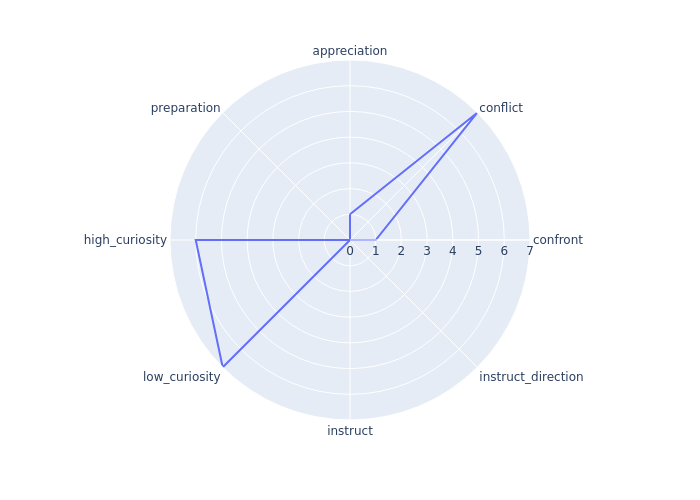

_______________

JULES


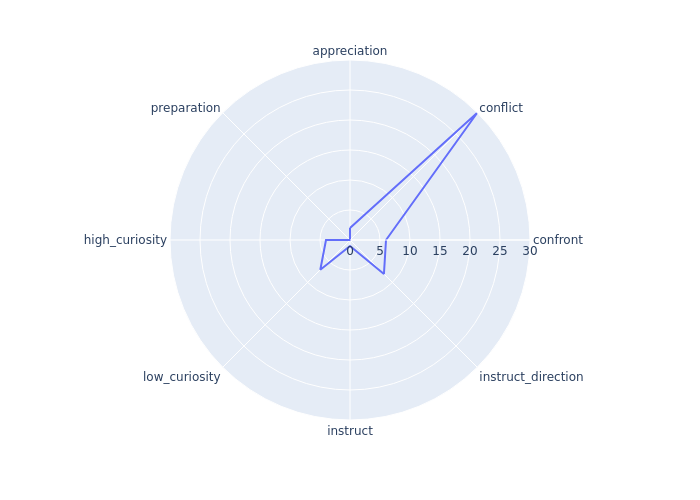

_______________

PATRON


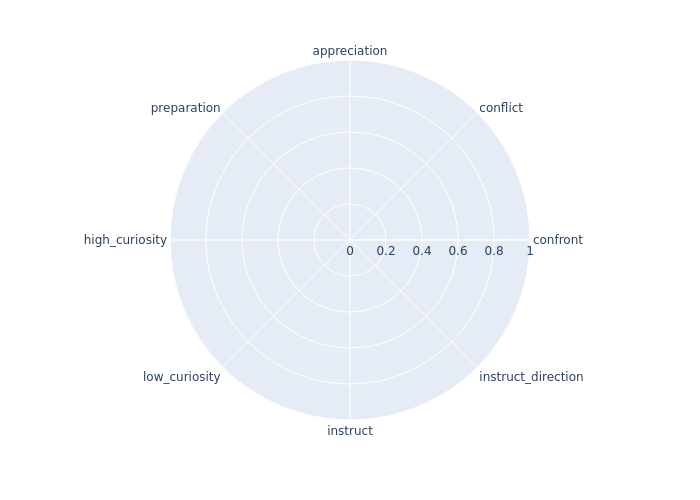

_______________

PUMPKIN


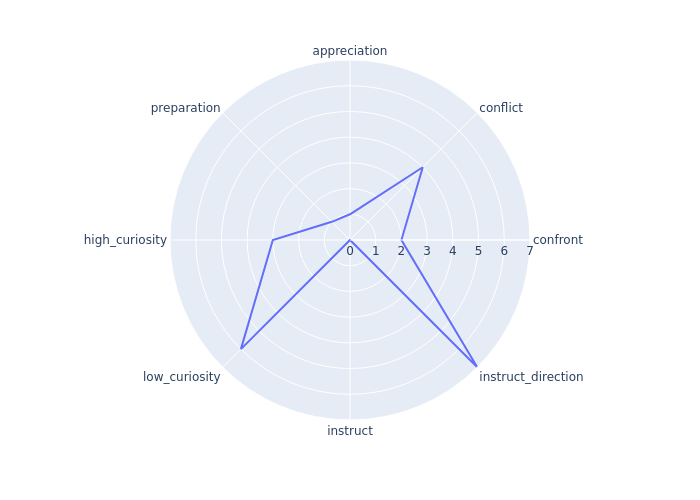

_______________

YOLANDA


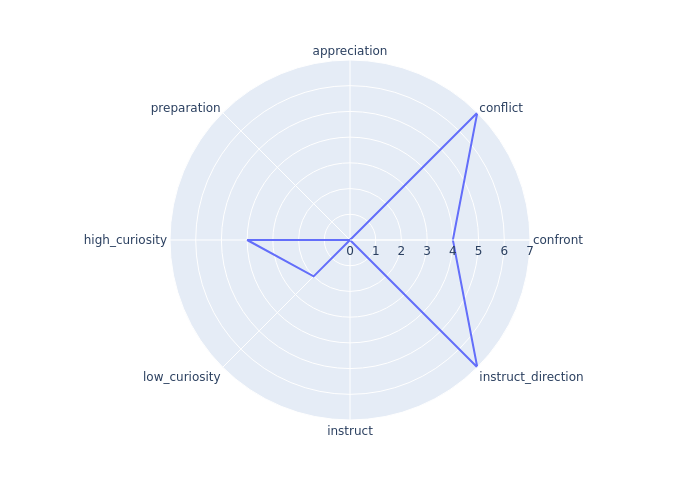

_______________

MANAGER


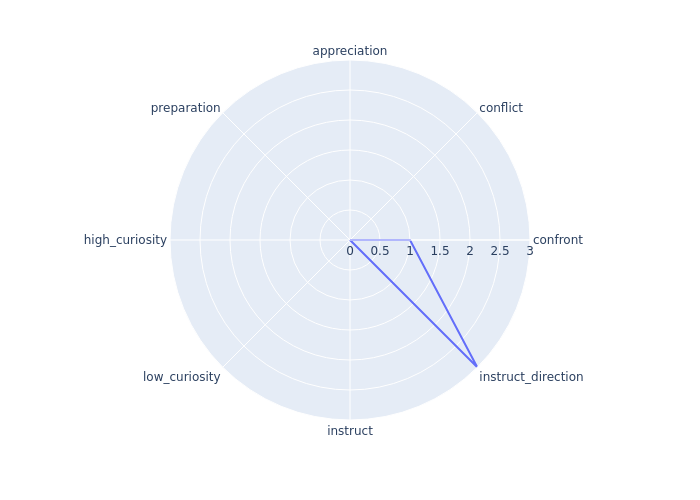

In [6]:
import plotly.express as px
import pandas as pd

for i in range(len(df)):

  name = df["Speaker"][i]

  # preparing values
  values = df.loc[i,behaviors].values.tolist()
  
  # plotting

  fig = px.line_polar(df, r=values, theta=behaviors, line_close=True)

  # printing name and the plot
  print("_______________\n")
  print(name)
  fig.show("png")

  # saving each plot as image
  fig.write_image("scatter_plot_"+str(i)+".png")

In [7]:
def estimate_speaking_time(phrase):
    # Define the average speaking rate in words per minute
    average_speaking_rate = 150  # You can adjust this value based on your specific use case

    # Calculate the number of words in the phrase
    words = len(phrase.split())

    # Calculate the time in seconds based on the average speaking rate
    time_in_minutes = words / average_speaking_rate
    time_in_seconds = time_in_minutes * 60

    return time_in_seconds

# Example usage:
input_phrase = "Hello, how are you doing today?"
estimated_time = estimate_speaking_time(input_phrase)
print(f"Estimated speaking time: {estimated_time:.2f} seconds")


df = pd.json_normalize(data['conversation']['talk_turns'])
# detects = df
print(df)


Estimated speaking time: 2.40 seconds
     index                                              input  \
0        0  Thanks a bunch.\n                             ...   
1        1                             Naw, I don't eat pork.   
2        2                                    Are you Jewish?   
3        3  I ain't Jewish man, I just don't dig \n       ...   
4        4                                           Why not?   
..     ...                                                ...   
128    128  You ain't gonna do a goddamn thing, \n        ...   
129    129                                              What?   
130    130  Your life. I'm givin' you that money \n       ...   
131    131                                     Not regularly.   
132    132  There's a passage I got memorized. \n         ...   

                             talk_turn_id  \
0    8c33e877-127d-4ee7-b835-fead2594dcc8   
1    f85c349f-5c07-4827-aa18-7a5fa0ac47ff   
2    00844310-1c3a-45c4-962f-64b4115d24ca   
3

In [8]:
def get_behavior(row):
    try:
        return row['behavior_detections'][0]['behaviors'][0]['name']
    except:
        return 'None'


In [21]:
for turn in df:
    print(turn)

# print(df['speaker.id'])

index_time = 0
start = 0
end = 0
starts = []
ends = []
delta = []
behaviors = []

starts.append(start)

for i, row in df.iterrows():
    behaviors.append(get_behavior(row))
    speakingtime = round(estimate_speaking_time(row.input),1)
    end = start + speakingtime
    print(i, row['speaker.id'], start, end, speakingtime )
    start = round(end, 2)
    ends.append(end)
    delta.append(speakingtime)
    starts.append(start)

print(len(starts[:-1]), len(ends))

df['starts'] = starts[:-1]
df['ends'] = ends
df['delta'] = delta
df['behaviors'] = behaviors
print(df)
    

index
input
talk_turn_id
behavior_detections
speaker.id
speaker.role
starts
ends
delta
behaviors
0 VINCENT 0 4.8 4.8
1 JULES 4.8 6.8 2.0
2 VINCENT 6.8 8.0 1.2
3 JULES 8.0 12.0 4.0
4 VINCENT 12.0 12.8 0.8
5 JULES 12.8 16.0 3.2
6 VINCENT 16.0 18.8 2.8
7 JULES 18.8 37.6 18.8
8 VINCENT 37.6 40.800000000000004 3.2
9 JULES 40.8 42.8 2.0
10 VINCENT 42.8 47.599999999999994 4.8
11 JULES 47.6 58.0 10.4
12 VINCENT 58.0 65.2 7.2
13 JULES 65.2 72.8 7.6
14 VINCENT 72.8 78.0 5.2
15 JULES 78.0 80.4 2.4
16 VINCENT 80.4 81.2 0.8
17 JULES 81.2 82.8 1.6
18 VINCENT 82.8 86.39999999999999 3.6
19 JULES 86.4 89.2 2.8
20 VINCENT 89.2 90.8 1.6
21 JULES 90.8 92.8 2.0
22 VINCENT 92.8 101.6 8.8
23 JULES 101.6 129.2 27.6
24 VINCENT 129.2 130.0 0.8
25 JULES 130.0 136.4 6.4
26 VINCENT 136.4 139.20000000000002 2.8
27 JULES 139.2 140.79999999999998 1.6
28 PATRON 140.8 141.60000000000002 0.8
29 VINCENT 141.6 145.2 3.6
30 JULES 145.2 154.0 8.8
31 VINCENT 154.0 156.8 2.8
32 JULES 156.8 164.0 7.2
33 VINCENT 164.0 167.6 3.6

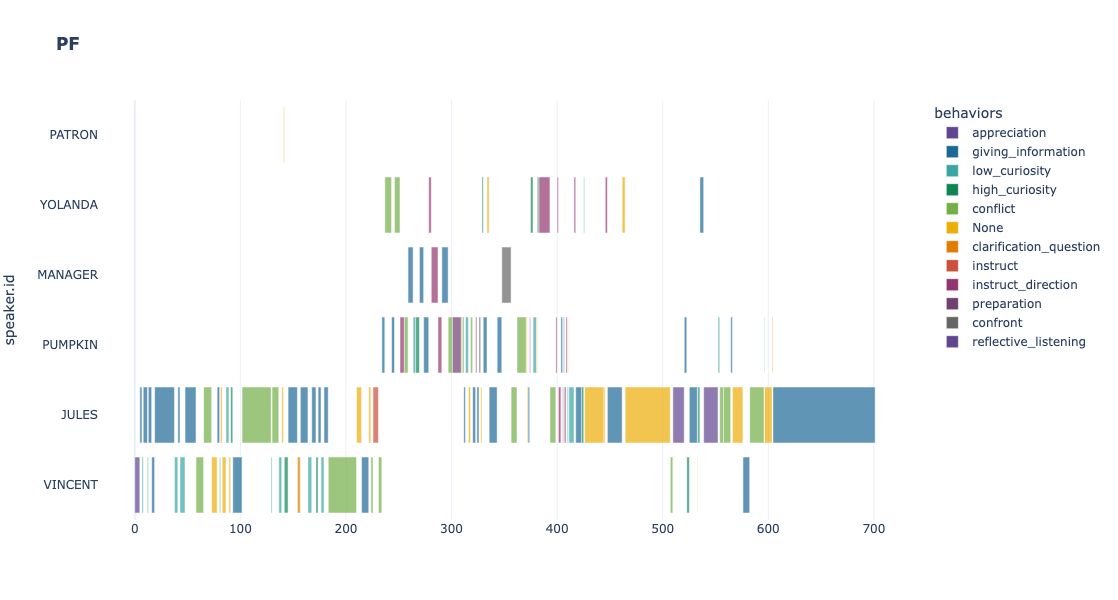

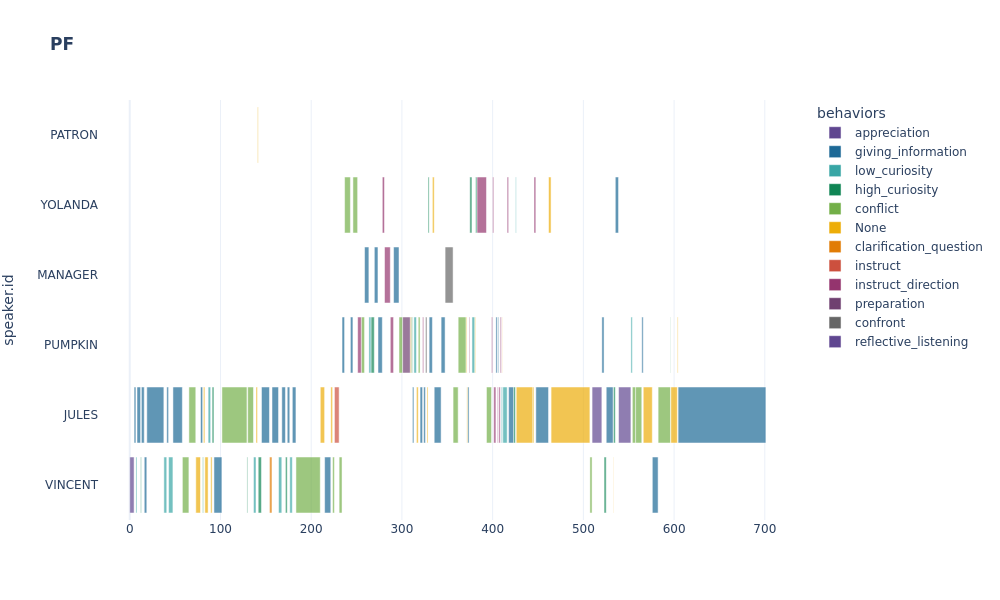

In [31]:

fig = px.timeline(df
                  , x_start="starts" 
                  , x_end="ends"
                  , y="speaker.id"  
                  , hover_data=["input"]
                  , width=1000, height=600
              , opacity=.7
              , color="behaviors" 
              , color_discrete_sequence=px.colors.qualitative.Prism
              , template='plotly_white'
              , title ="<b>PF</b>"                 
)
fig.update_layout(xaxis_type='linear')
f = fig.full_figure_for_development(warn=False)

for d in fig.data:
  filt = df['behaviors'] == d.name
  d.x = df[filt]['delta'].tolist()

# fig.data[0].x = df.delta.tolist()
fig.show()
fig.show("png")